In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:

# Load EMNIST dataset
emnist = datasets.fetch_openml('mnist_784')
X = emnist.data # Features
y = emnist.target # Labels


C:\Users\Sourav\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# Preprocess the data
X_train = X_train / 255.0 # Normalize
X_test = X_test / 255.0 # Normalize
X_train = X_train.values.reshape(-1, 784) # Flatten
X_test = X_test.values.reshape(-1, 784) # Flatten


In [5]:

# Define the SVM model
model = svm.SVC(kernel='linear', C=1.0)


In [6]:

# Train the model on the training data
model.fit(X_train, y_train)


SVC(kernel='linear')

In [13]:

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2))


Accuracy:  93.51


In [14]:
import pickle

# save
with open('C:/Project/ml mini projrct/model.pkl','wb') as f:
    pickle.dump(model,f)

# load
with open('C:/Project/ml mini projrct/model.pkl', 'rb') as f:
    model = pickle.load(f)

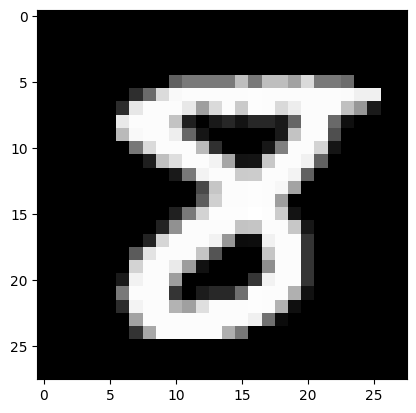

Predicted label:  ['8']


In [15]:

# Predict the label of a new handwritten image
new_image = X_test[0] # Sample image from test set
plt.imshow(new_image.reshape(28, 28), cmap='gray') # Plot the image
plt.show()
new_label = model.predict(new_image.reshape(1, -1)) # Predict the label
print("Predicted label: ", new_label)


In [9]:
print(y_train, y_test)

47339    5
67456    4
12308    8
32557    0
664      2
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 56000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'] 46730    8
48393    4
41416    8
34506    7
43725    7
        ..
21525    3
16276    5
24390    2
28061    7
63452    1
Name: class, Length: 14000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


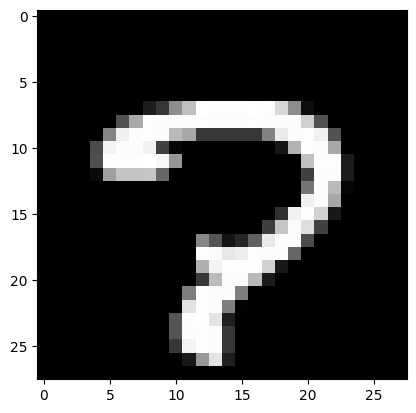

Predicted label:  ['7']


In [10]:
new_image = X_test[18] # Sample image from test set
plt.imshow(new_image.reshape(28, 28), cmap='gray') # Plot the image
plt.show()
new_label = model.predict(new_image.reshape(1, -1)) # Predict the label
print("Predicted label: ", new_label)

In [11]:
print(model)

SVC(kernel='linear')
